In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
df_hr=pd.read_csv('train.csv')
df_hr.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
df_hr=df_hr.set_index('employee_id')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
df_hr.shape

(54808, 12)

In [6]:
df_hr.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
df_hr.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
df_hr.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
df_hr['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [10]:
df_hr['region'].nunique()

34

In [11]:
df_hr.groupby('region')['is_promoted'].mean()

region
region_1     0.095082
region_10    0.078704
region_11    0.056274
region_12    0.066000
region_13    0.086858
region_14    0.074970
region_15    0.079060
region_16    0.069625
region_17    0.136935
region_18    0.032258
region_19    0.060641
region_2     0.080126
region_20    0.057647
region_21    0.043796
region_22    0.114188
region_23    0.116596
region_24    0.035433
region_25    0.125763
region_26    0.063274
region_27    0.078963
region_28    0.116844
region_29    0.043260
region_3     0.106936
region_30    0.089802
region_31    0.056848
region_32    0.042328
region_33    0.037175
region_34    0.027397
region_4     0.144451
region_5     0.045692
region_6     0.046377
region_7     0.106546
region_8     0.080916
region_9     0.019048
Name: is_promoted, dtype: float64

In [12]:
df_hr['region']=df_hr.groupby('region')['is_promoted'].transform('mean')

In [14]:
df_hr['region'].value_counts()

0.080126    12343
0.114188     6428
0.106546     4843
0.079060     2808
0.086858     2648
0.063274     2260
0.056848     1935
0.144451     1703
0.078963     1659
0.069625     1465
0.116844     1318
0.056274     1315
0.116596     1175
0.043260      994
0.042328      945
0.060641      874
0.057647      850
0.074970      827
0.125763      819
0.136935      796
0.045692      766
0.046377      690
0.089802      657
0.080916      655
0.078704      648
0.095082      610
0.035433      508
0.066000      500
0.019048      420
0.043796      411
0.106936      346
0.027397      292
0.037175      269
0.032258       31
Name: region, dtype: int64

In [15]:
df_hr.groupby('department')['is_promoted'].mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

In [16]:
df_hr['department']=df_hr.groupby('department')['is_promoted'].transform('mean')

In [17]:
df_hr['department'].value_counts()

0.072031    16840
0.090148    11348
0.107593     7138
0.096386     7138
0.095665     5352
0.081230     2536
0.056245     2418
0.051011     1039
0.069069      999
Name: department, dtype: int64

In [18]:
df_hr['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [19]:
df_hr1=pd.get_dummies(df_hr,columns=['gender','recruitment_channel'],drop_first=True)

In [20]:
df_hr1.head(5)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,Master's & above,1,35,5.0,8,0,49,0,0,0,1
65141,0.090148,0.114188,Bachelor's,1,30,5.0,4,0,60,0,1,0,0
7513,0.072031,0.060641,Bachelor's,1,34,3.0,7,0,50,0,1,0,1
2542,0.072031,0.116596,Bachelor's,2,39,1.0,10,0,50,0,1,0,0
48945,0.107593,0.063274,Bachelor's,1,45,3.0,2,0,73,0,1,0,0


In [21]:
df_hr1.isnull().sum()

department                         0
region                             0
education                       2409
no_of_trainings                    0
age                                0
previous_year_rating            4124
length_of_service                  0
awards_won                         0
avg_training_score                 0
is_promoted                        0
gender_m                           0
recruitment_channel_referred       0
recruitment_channel_sourcing       0
dtype: int64

In [22]:
df_hr1['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [23]:
df_hr1['education'].replace({"Below Secondary":0,"Bachelor's":1,"Master's & above":2},inplace=True)

In [24]:
df_hr['previous_year_rating']=df_hr['previous_year_rating'].fillna(df_hr['previous_year_rating'].median())

In [25]:
df_hr1.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,2.0,1,35,5.0,8,0,49,0,0,0,1
65141,0.090148,0.114188,1.0,1,30,5.0,4,0,60,0,1,0,0
7513,0.072031,0.060641,1.0,1,34,3.0,7,0,50,0,1,0,1
2542,0.072031,0.116596,1.0,2,39,1.0,10,0,50,0,1,0,0
48945,0.107593,0.063274,1.0,1,45,3.0,2,0,73,0,1,0,0


In [26]:
df_hr1['department'].value_counts()

0.072031    16840
0.090148    11348
0.107593     7138
0.096386     7138
0.095665     5352
0.081230     2536
0.056245     2418
0.051011     1039
0.069069      999
Name: department, dtype: int64

In [27]:
from sklearn.impute import KNNImputer
impu=KNNImputer()
df=impu.fit_transform(df_hr1)

df_hr2=pd.DataFrame(df,columns=df_hr1.columns,index=df_hr1.index)

In [28]:
df_hr2.isnull().sum()

department                      0
region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
is_promoted                     0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

In [29]:
df_hr2.head(2)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,2.0,1.0,35.0,5.0,8.0,0.0,49.0,0.0,0.0,0.0,1.0
65141,0.090148,0.114188,1.0,1.0,30.0,5.0,4.0,0.0,60.0,0.0,1.0,0.0,0.0


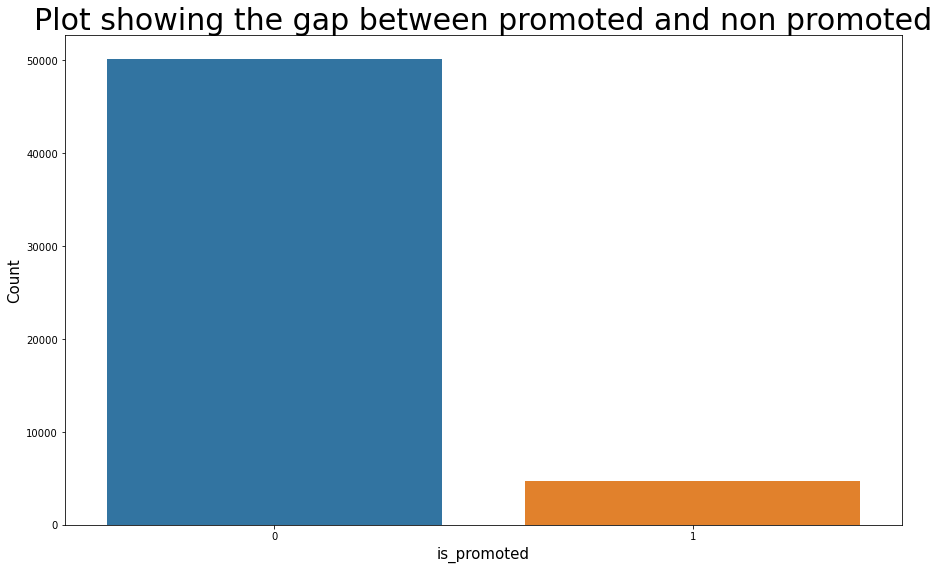

In [30]:
plt.figure(figsize=(15,9))
sns.countplot(df_hr['is_promoted'])
plt.title('Plot showing the gap between promoted and non promoted',fontsize=30)
plt.xlabel('is_promoted',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [31]:
df_hr['awards_won'].value_counts()

0    53538
1     1270
Name: awards_won, dtype: int64

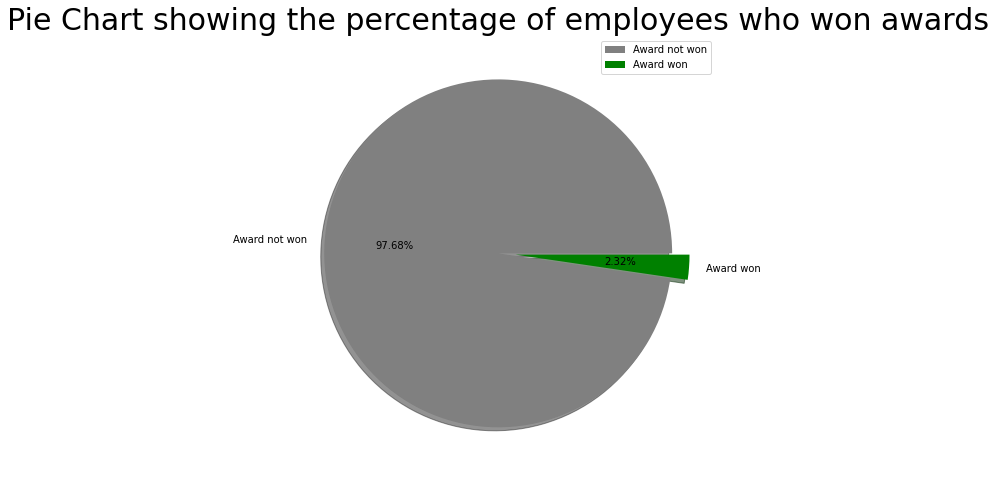

In [32]:
size = [53538, 1270]
labels = "Award not won", "Award won"
colors = ['grey', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Pie Chart showing the percentage of employees who won awards', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### There are overall 2.32% of employess who won the award.

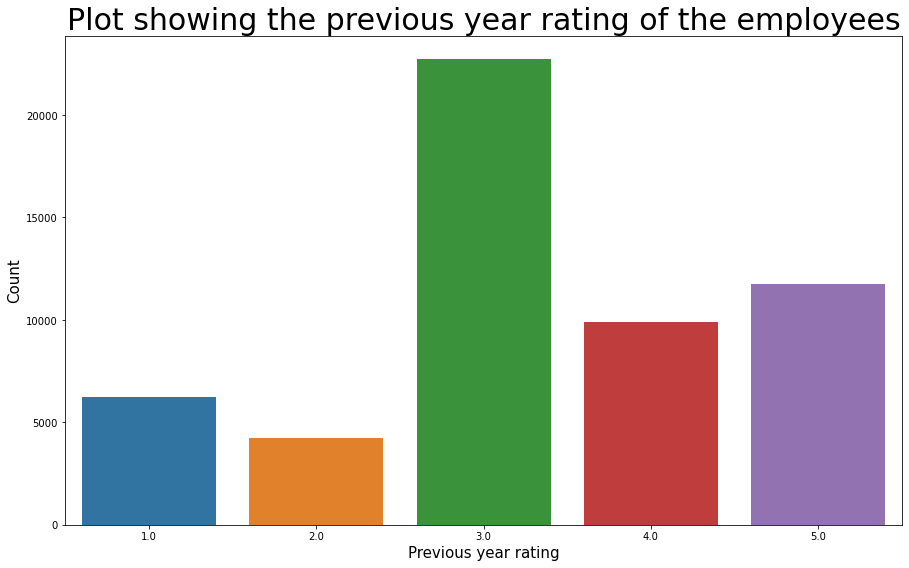

In [32]:
plt.figure(figsize=(15,9))
sns.countplot(df_hr['previous_year_rating'])
plt.title('Plot showing the previous year rating of the employees',fontsize=30)
plt.xlabel('Previous year rating',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### The above plot explains that the rating 3 is higher than other ratings. Therefore it is explainable that there are more number of employees with average rating than with lower or higher ratings.

In [33]:
df_hr['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

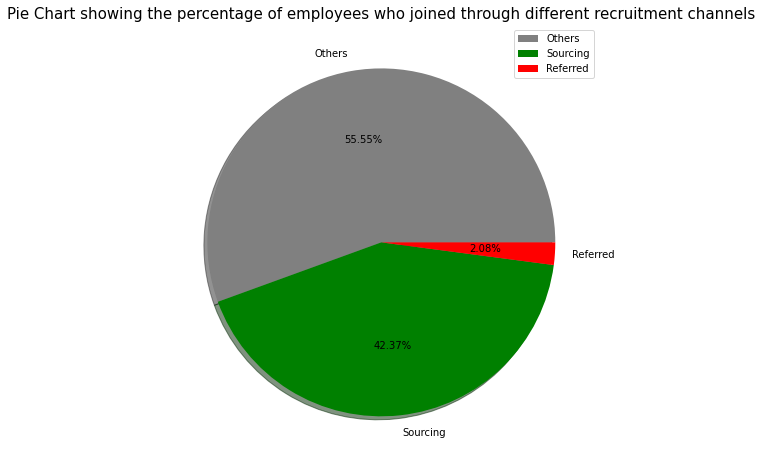

In [34]:
size = [30446, 23220,1142]
labels = "Others", "Sourcing","Referred"
colors = ['grey', 'green','red']
explode = [0,0,0]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Pie Chart showing the percentage of employees who joined through different recruitment channels', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

### There are 2.08% of employees who are recruited through reference, 42.37% of employees are recruited through sourcing and 55.55% of employees from others.

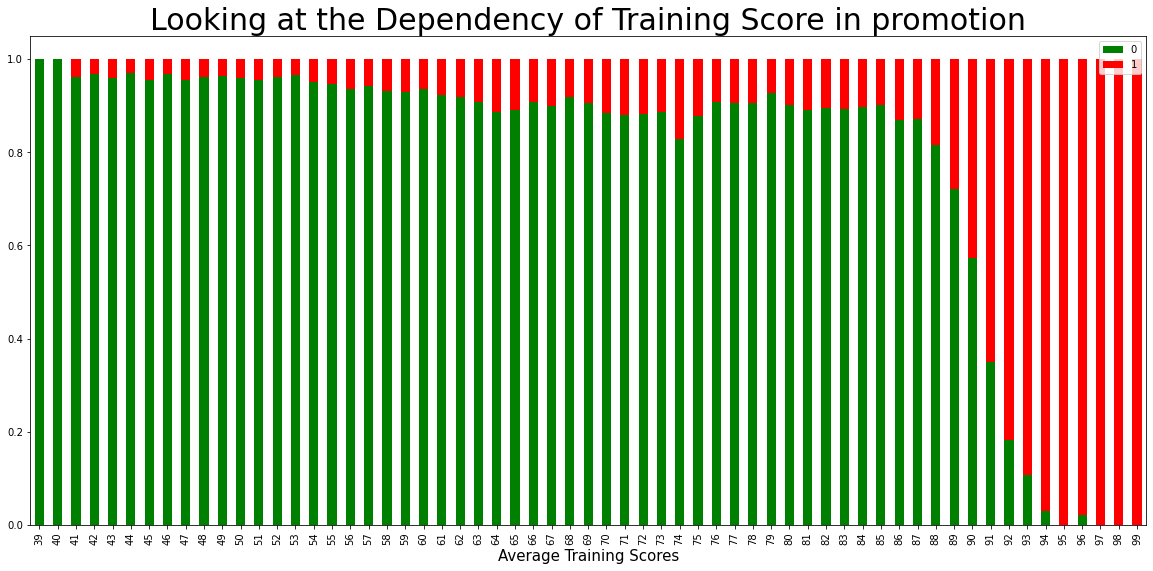

In [35]:
tab = pd.crosstab(df_hr['avg_training_score'], df_hr['is_promoted'])
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['green', 'red'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

### The above plot explains that increase in training score increases promotion.

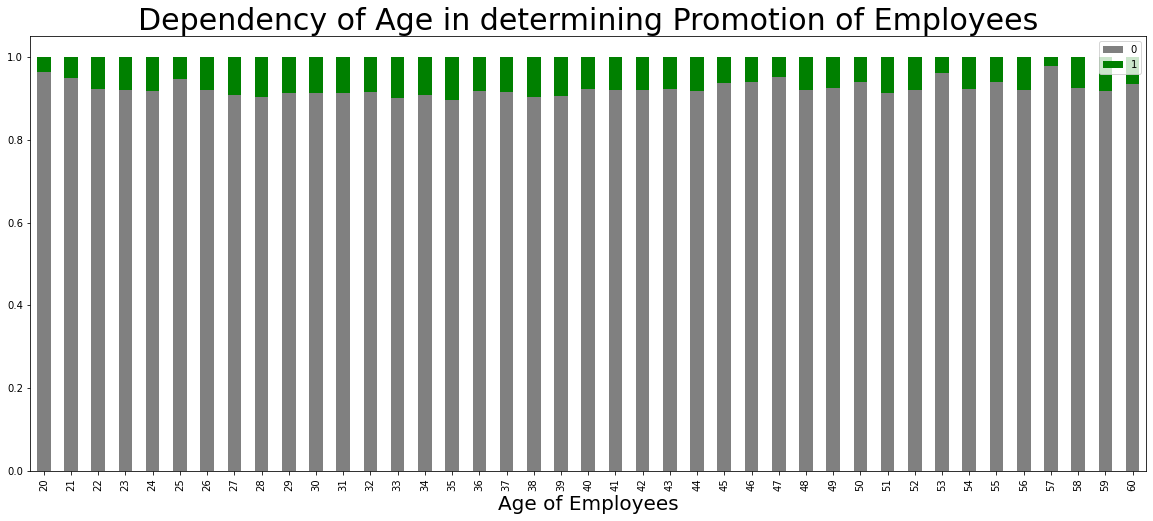

In [36]:
tab = pd.crosstab(df_hr['age'], df_hr['is_promoted'])
tab.div(tab.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['grey', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

### There is equal share of promotion for freshers whose age is lesser and senior citizens. Therefore age doesn't have any impact on promotion.

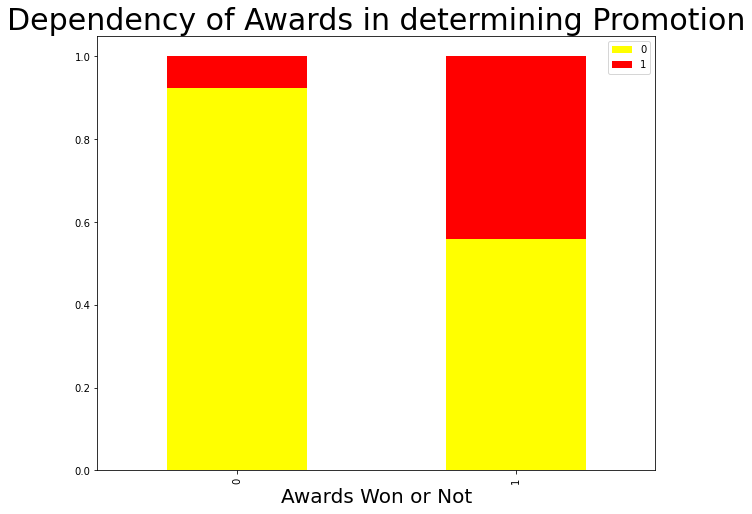

In [37]:
data = pd.crosstab(df_hr['awards_won'], df_hr['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['yellow', 'red'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()


### The employee who has won an award has higher chance for promotion than the employee who have not won any award.

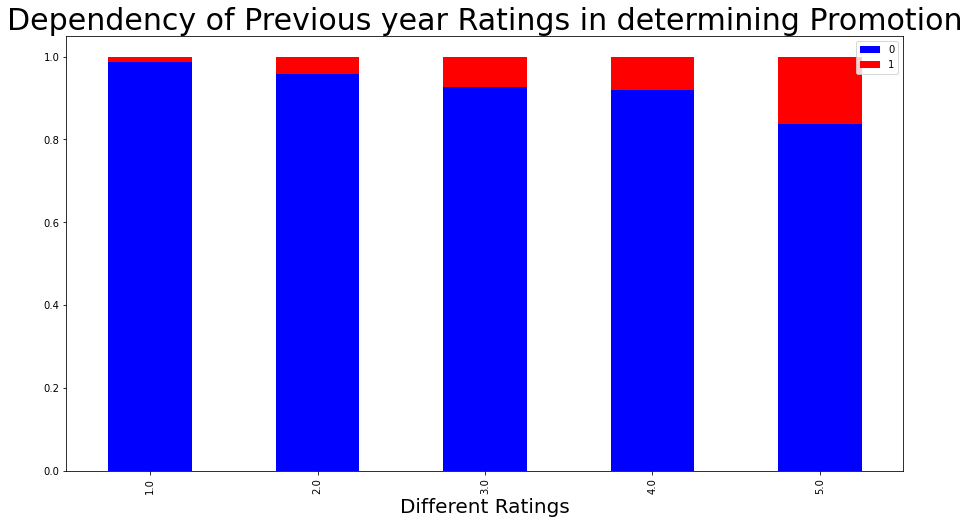

In [38]:
tab = pd.crosstab(df_hr['previous_year_rating'],df_hr['is_promoted'])
tab.div(tab.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['blue', 'red'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

### The above graph clearly suggests that previous ratings have significant effect on promotion, when the ratings are high, the chances of being promoted in the company is increasing and vice versa.

In [39]:
df_hr['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

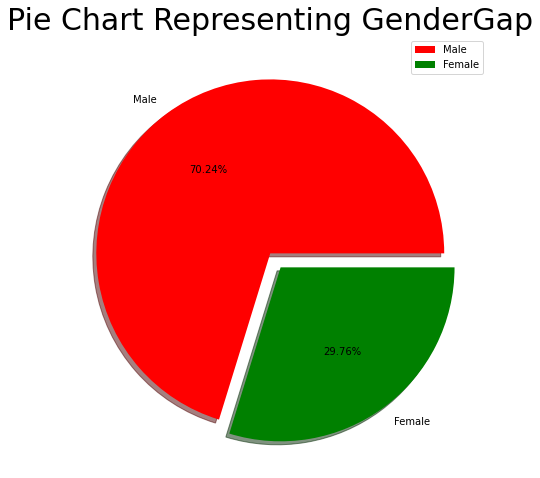

In [40]:
size = [38496, 16312]
labels = "Male", "Female"
colors = ['red', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### The above chart explains that the dataset has overall 70.24 % of male and 29.76% of female working the company.

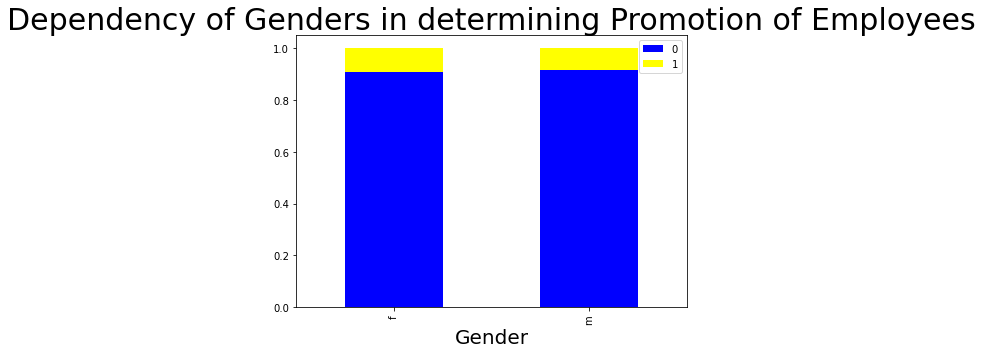

In [41]:
tab = pd.crosstab(df_hr['gender'], df_hr['is_promoted'])
tab.div(tab.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['blue', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

### There is no partiality between genders for promotion.

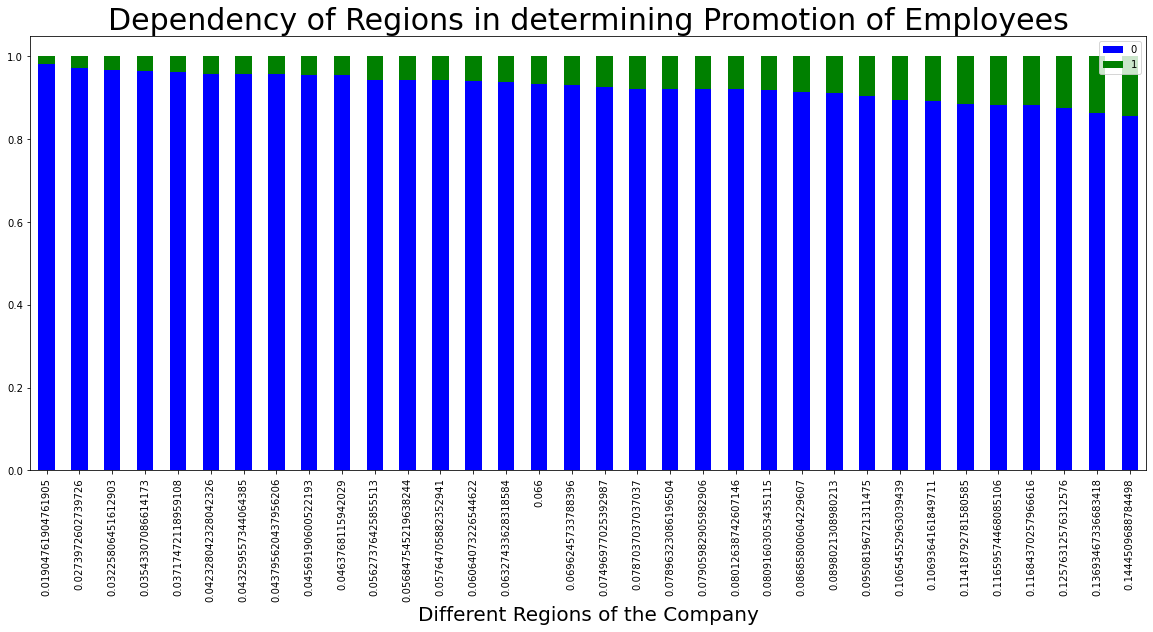

In [42]:
tab = pd.crosstab(df_hr['region'], df_hr['is_promoted'])
tab.div(tab.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['blue', 'green'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

### The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

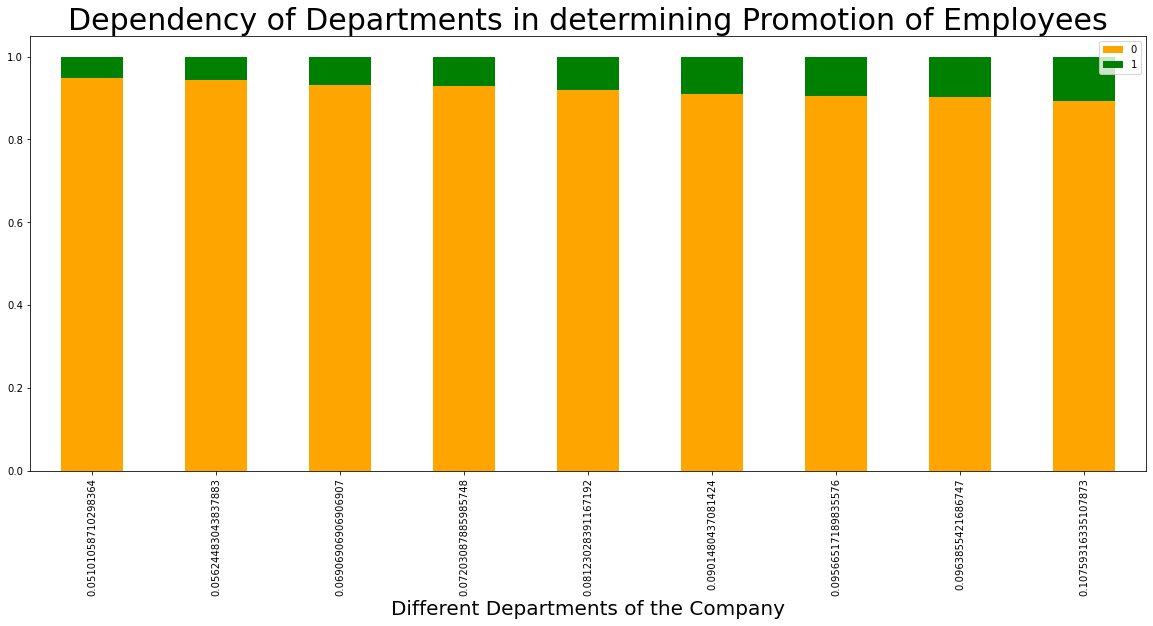

In [43]:
tab = pd.crosstab(df_hr['department'], df_hr['is_promoted'])
tab.div(tab.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'green'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

### The above plot explains that the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

In [44]:
import scipy.stats as stats

In [45]:
#ho:Education and promotion are not related(independent)
#ha:Education and promotion  are related (dependent)

In [46]:
ob=pd.crosstab(df_hr['education'],df_hr['is_promoted'])
ob

is_promoted,0,1
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


In [47]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [48]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 36.70295913519633
p value 1.0716517784616584e-08
degree of freedom 2
expected table [[33487.69360102  3181.30639898]
 [  735.1603084     69.8396916 ]
 [13630.14609057  1294.85390943]]


In [49]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#education and promotion are dependent on eachother.

In [50]:
#ho:Department and promotion are not related (independent)
#ha:Education and promotion  are related (dependent)

In [51]:
ob=pd.crosstab(df_hr['department'],df_hr['is_promoted'])
ob

is_promoted,0,1
department,,
0.051011,986,53
0.056245,2282,136
0.069069,930,69
0.072031,15627,1213
0.081230,2330,206
0.090148,10325,1023
0.095665,4840,512
0.096386,6450,688
0.107593,6370,768


In [52]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [53]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 151.4263551632387
p value 9.882497107474632e-29
degree of freedom 8
expected table [[  950.50831995    88.49168005]
 [ 2212.05882353   205.94117647]
 [  913.91512188    85.08487812]
 [15405.73638885  1434.26361115]
 [ 2320.00875785   215.99124215]
 [10381.49029339   966.50970661]
 [ 4896.1699022    455.8300978 ]
 [ 6530.05619618   607.94380382]
 [ 6530.05619618   607.94380382]]


In [54]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#department and promotion are dependent on eachother.

In [55]:
#ho:Region and promotion are not related (independent)
#ha:Region and promotion  are related (dependent)

In [56]:
ob=pd.crosstab(df_hr['region'],df_hr['is_promoted'])

In [57]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [58]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 475.64023775792066
p value 7.275378205784026e-80
degree of freedom 33
expected table [[3.84228580e+02 3.57714202e+01]
 [2.67130346e+02 2.48696541e+01]
 [2.83597285e+01 2.64027149e+00]
 [4.64733616e+02 4.32663845e+01]
 [2.46089257e+02 2.29107430e+01]
 [8.64514304e+02 8.04856955e+01]
 [9.09340972e+02 8.46590279e+01]
 [3.75995110e+02 3.50048898e+01]
 [7.00759743e+02 6.52402569e+01]
 [6.31232667e+02 5.87673332e+01]
 [1.20300139e+03 1.11998613e+02]
 [1.77019596e+03 1.64804043e+02]
 [7.77605459e+02 7.23945409e+01]
 [7.99561378e+02 7.44386221e+01]
 [2.06751569e+03 1.92484309e+02]
 [4.57414976e+02 4.25850241e+01]
 [1.34022588e+03 1.24774121e+02]
 [7.56564370e+02 7.04356298e+01]
 [5.92809809e+02 5.51901912e+01]
 [1.51770289e+03 1.41297110e+02]
 [2.56884250e+03 2.39157495e+02]
 [1.12917461e+04 1.05125390e+03]
 [5.99213618e+02 5.57863816e+01]
 [2.42246971e+03 2.25530288e+02]
 [6.01043278e+02 5.59567216e+01]
 [5.58046271e+02 5.19537294e+01]
 [4.43052146e+03 4.12478543e+02]
 [3.1653

In [59]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#region and promotion are dependent on eachother.

In [60]:
#ho:Gender and promotion are not related (independent)
#ha:Gender and promotion  are related (dependent)

In [61]:
ob=pd.crosstab(df_hr['gender'],df_hr['is_promoted'])
ob

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [62]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [63]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 6.677254566546107
p value 0.009765091521176657
degree of freedom 1
expected table [[14922.70617428  1389.29382572]
 [35217.29382572  3278.70617428]]


In [64]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#gender and promotion are dependent on eachother.

In [65]:
#ho:Recruitment channel and promotion are not related (independent)
#ha:Recruitment channel and promotion  are related (dependent)

In [66]:
ob=pd.crosstab(df_hr['recruitment_channel'],df_hr['is_promoted'])
ob

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [67]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [68]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 19.23633518768639
p value 6.650937825577018e-05
degree of freedom 2
expected table [[27852.91271347  2593.08728653]
 [ 1044.73580499    97.26419501]
 [21242.35148154  1977.64851846]]


In [69]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#recruitment channel and promotion are dependent on eachother.

In [70]:
#ho:Awards won and promotion are not related (independent)
#ha:Awards won and promotion  are related (dependent)

In [71]:
ob=pd.crosstab(df_hr['awards_won'],df_hr['is_promoted'])
ob

is_promoted,0,1
awards_won,,
0,49429,4109
1,711,559


In [72]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [73]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 2098.0719210465427
p value 0.0
degree of freedom 1
expected table [[48978.16596117  4559.83403883]
 [ 1161.83403883   108.16596117]]


In [74]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#awards won and promotion are dependent on eachother.

In [75]:
import scipy.stats as stats

In [76]:
ob=pd.crosstab(df_hr['no_of_trainings'],df_hr['is_promoted'])

In [77]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [78]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 35.132401310728966
p value 5.6462682173663955e-05
degree of freedom 9
expected table [[4.05983236e+04 3.77967640e+03]
 [7.30674683e+03 6.80253175e+02]
 [1.62473799e+03 1.51262006e+02]
 [4.28140417e+02 3.98595825e+01]
 [1.17098234e+02 1.09017662e+01]
 [4.02525179e+01 3.74748212e+00]
 [1.09779594e+01 1.02204058e+00]
 [4.57414976e+00 4.25850241e-01]
 [4.57414976e+00 4.25850241e-01]
 [4.57414976e+00 4.25850241e-01]]


In [79]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#no of trainings and promotion are dependent on eachother.

In [80]:
stats.shapiro(df_hr['age'])

ShapiroResult(statistic=0.9310371279716492, pvalue=0.0)

In [81]:
age_promoted = df_hr[df_hr['is_promoted']==1]['age']
age_not_promoted = df_hr[df_hr['is_promoted']==0]['age']

In [82]:
stats.kruskal(age_promoted,age_not_promoted)

KruskalResult(statistic=6.356054626209985, pvalue=0.011698138540257341)

In [83]:
#ho: mean of age promoted = mean of age not promoted
#ha: mean of age promoted != mean of age not promoted

In [84]:
#null hypothesis is accepted
#age and promoted are related

In [85]:
ob=pd.crosstab(df_hr['previous_year_rating'],df_hr['is_promoted'])

In [86]:
test_stat,pval,df,expected=stats.chi2_contingency(ob)

In [87]:
print('test statistics',test_stat)
print('p value',pval)
print('degree of freedom',df)
print('expected table',expected)

test statistics 1464.9316966536803
p value 0.0
degree of freedom 4
expected table [[ 5692.98679025   530.01320975]
 [ 3865.15654649   359.84345351]
 [20805.06276456  1936.93723544]
 [ 9035.77543424   841.22456576]
 [10741.01846446   999.98153554]]


In [88]:
#pvalue < 0.05 therefore null hypothesis is rejected.
#previous year rating and promotion are dependent on eachother.

In [89]:
stats.shapiro(df_hr['length_of_service'])

ShapiroResult(statistic=0.854493260383606, pvalue=0.0)

In [90]:
ser = df_hr[df_hr['is_promoted']==1]['length_of_service']
sernp = df_hr[df_hr['is_promoted']==0]['length_of_service']

In [91]:
stats.kruskal(ser,sernp)

KruskalResult(statistic=1.3916187827220978, pvalue=0.2381319161417078)

In [92]:
#ho: mean of length of service promoted = mean of length of service not promoted( does not influence)
#ha: mean of length of service promoted != mean of length of service not promoted(influence)

In [93]:
#null hypothesis is accepted
#length of service does not influence promotion

In [94]:
stats.shapiro(df_hr['avg_training_score'])

ShapiroResult(statistic=0.927911639213562, pvalue=0.0)

In [95]:
avgp = df_hr[df_hr['is_promoted']==1]['avg_training_score']
avgnp = df_hr[df_hr['is_promoted']==0]['avg_training_score']

In [96]:
stats.kruskal(avgp,avgnp)

KruskalResult(statistic=1479.4918948567117, pvalue=0.0)

In [97]:
#ho: mean of average training promoted = mean of average training not promoted( does not influence)
#ha: mean of average training promoted != mean of average training  not promoted(influence)

In [98]:
#null hypothesis is accepted
#average training score influence promotion

In [99]:
df_out=df_hr2[['is_promoted']]

In [100]:
df_out.isnull().sum()

is_promoted    0
dtype: int64

In [101]:
dfw=df_hr2.drop('is_promoted',1)

In [102]:
dfw.head(2)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,
65438,0.072031,0.106546,2.0,1.0,35.0,5.0,8.0,0.0,49.0,0.0,0.0,1.0
65141,0.090148,0.114188,1.0,1.0,30.0,5.0,4.0,0.0,60.0,1.0,0.0,0.0


In [103]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_sca=ss.fit_transform(dfw)
df_num_sca = pd.DataFrame(num_sca, columns = dfw.columns)

In [104]:
df_num_sca.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.895520,0.822025,1.564112,-0.415276,0.025598,1.369359,0.500460,-0.154018,-1.075931,-1.536223,-0.145876,1.166353
1,0.339283,1.115924,-0.558277,-0.415276,-0.627135,1.369359,-0.437395,-0.154018,-0.253282,0.650947,-0.145876,-0.857373
2,-0.895520,-0.943310,-0.558277,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-1.001145,0.650947,-0.145876,1.166353
3,-0.895520,1.208520,-0.558277,1.226063,0.547785,-1.901429,0.969387,-0.154018,-1.001145,0.650947,-0.145876,-0.857373
4,1.528282,-0.842031,-0.558277,-0.415276,1.331064,-0.266035,-0.906322,-0.154018,0.718939,0.650947,-0.145876,-0.857373


In [105]:
# df_in=df_num_sca.drop('is_promoted',axis=1)

In [106]:
df_out.head()

,is_promoted
employee_id,
65438,0.0
65141,0.0
7513,0.0
2542,0.0
48945,0.0


In [107]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [108]:
df_hr2['is_promoted'].isnull().sum()

0

In [109]:
X = sm.add_constant(df_num_sca)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, df_out, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (38365, 13)
y_train (38365, 1)
X_test (16443, 13)
y_test (16443, 1)


In [111]:
y_train.shape

(38365, 1)

In [112]:
X_train.shape

(38365, 13)

In [113]:
logreg = sm.Logit(y_train.values.reshape(-1,1),X_train).fit()

Optimization terminated successfully.
         Current function value: 0.248234
         Iterations 7


In [114]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                38365
Model:                          Logit   Df Residuals:                    38352
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                  0.1515
Time:                        15:26:17   Log-Likelihood:                -9523.5
converged:                       True   LL-Null:                       -11223.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7941      0.025   -112.791      0.000      -2.843      -2.746
department                      -0.3181      0.024    -13.036      0.000     

In [115]:
y_pred_prob = logreg.predict(X_test)

In [116]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [117]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.71      0.09      0.16      1379

    accuracy                           0.92     16443
   macro avg       0.82      0.54      0.56     16443
weighted avg       0.91      0.92      0.89     16443



In [118]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [119]:
df_hr2['is_promoted'].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [120]:
count_class_0 = 25000
count_class_1 = 25000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
inp_bal, out_bal = pipe.fit_resample(X,df_out)

In [121]:
X_train,X_test,y_train,y_test=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=48)

In [122]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
ypred=lm.predict(X_test)

In [123]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70      7529
         1.0       0.70      0.62      0.66      7471

    accuracy                           0.68     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.68      0.68      0.68     15000



In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
from xgboost import XGBClassifier

In [125]:
clf1 = LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3=  RandomForestClassifier(random_state=0)
clf4 = KNeighborsClassifier(n_neighbors=5) 
clf5= GaussianNB()
clf6=XGBClassifier(verbosity=0,random_state=0)

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp_bal,out_bal, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.6657246283154498 0.0065260827262186875
DT 0.8713481637535256 0.004835387918697524
RF 0.9239126340023918 0.001971080113037405
KNN 0.8268862975249693 0.0025086352183802166
GNB 0.4330305303867476 0.010388030296658851
XGB 0.9336699589092723 0.0021046878706364137


In [128]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [136]:
from sklearn.ensemble import VotingClassifier

In [137]:
estimator=[('RF',RandomForestClassifier()),('DT',DecisionTreeClassifier()),
          ('XGB',XGBClassifier(verbosity=0))]

In [138]:
vot1=VotingClassifier(estimators=estimator, voting='hard')  
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [139]:
score_vot1 = cross_val_score(vot1, inp_bal,out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot2, inp_bal,out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

vot1 0.9302728695487186 0.0016517468084469487
vot2 0.9187988946816527 0.0009995346373073543


In [140]:
# from sklearn.model_selection import GridSearchCV

In [141]:
# tuning_parameters = {'n_estimators':[50, 100, 150, 200, 300],
#                     'colsample_bytree':[0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# xgb_model = XGBClassifier()

# xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# xgb_grid.fit(X_train, y_train)

# print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [142]:
def get_test_report(model):
     
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [143]:
xgb_grid_model = XGBClassifier(learning_rate = 0.2,
                               max_depth = 9,
                              gamma = 4)

xgb_model = xgb_grid_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      7529
         1.0       0.99      0.89      0.93      7471

    accuracy                           0.94     15000
   macro avg       0.94      0.94      0.94     15000
weighted avg       0.94      0.94      0.94     15000



In [144]:
cl = XGBClassifier(learning_rate = 0.2, max_depth = 9, gamma = 4, verbosity=0, random_state=0)

In [145]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [146]:
score = cross_val_score(cl, inp_bal,out_bal, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.9339419851268204 0.0019357700485881444


In [147]:
from sklearn.ensemble import VotingClassifier
estimator=[('RF',RandomForestClassifier(criterion= 'gini',max_depth= 25,max_features= 'sqrt',n_estimators= 45)),
           ('DT',DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, max_features= 'sqrt', 
                                        max_leaf_nodes= 9, min_samples_leaf= 5, min_samples_split= 3)),
          ('XGB',XGBClassifier(colsample_bytree= 0.5, n_estimators= 100, learning_rate= 0.2, 
                               max_depth= 9, gamma= 4,verbosity=0))]

In [148]:
vot_1=VotingClassifier(estimators=estimator, voting='hard')  
vot_2=VotingClassifier(estimators=estimator, voting='soft')

In [149]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [150]:
score_vot1 = cross_val_score(vot_1, inp_bal,out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot_2, inp_bal,out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

vot1 0.9235177907606051 0.0020917400742024857
vot2 0.9332910663345411 0.0022873175117804887


In [151]:
vot_2.fit(X_train.drop('const',1),y_train)
ypred=vot_2.predict(X_test.drop('const',1))

In [152]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7529
         1.0       0.98      0.89      0.93      7471

    accuracy                           0.94     15000
   macro avg       0.94      0.93      0.93     15000
weighted avg       0.94      0.94      0.93     15000



In [153]:
import pickle

In [154]:
pickle.dump(vot_2,open('vot2_rsa','wb'))

In [155]:
file = open("vot2_rsa",'rb')
object_file = pickle.load(file)

In [156]:
# Loading the saved pickle file and rechecking the metrics with above voting classification report

ypred=object_file.predict(X_test.drop('const',1))

In [157]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7529
         1.0       0.98      0.89      0.93      7471

    accuracy                           0.94     15000
   macro avg       0.94      0.93      0.93     15000
weighted avg       0.94      0.94      0.93     15000

